In [328]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.stats import chi2

# Question 1

## Part A

In [174]:
x_data, y_data, yerr_data = np.loadtxt('data/curvefit_dataset1.csv', delimiter=',').T

In [175]:
def fit_func(x, a, b):
    return a*x*np.exp(-b*x)

In [176]:
popt, pcov = curve_fit(fit_func, x_data, y_data, sigma=yerr_data)
perr = np.sqrt(np.diag(pcov))

In [177]:
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model = fit_func(x_model, *popt)

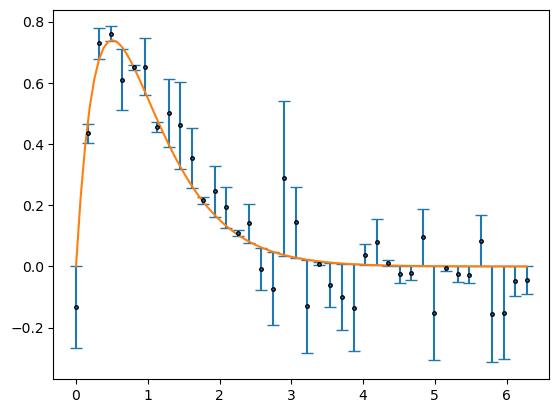

In [178]:
plt.errorbar(x_data, y_data, yerr_data, ls='', capsize=4, marker='.', ms=5, mec='black')
plt.plot(x_model, y_model)

## Part B

In [179]:
x_data, y_data, yerr_data = np.loadtxt('data/curvefit_dataset2.csv', delimiter=',').T

In [180]:
def fit_func(x, a, b, c, d):
    return a*np.exp(-b*np.sqrt(x)) + c*np.exp(-d*np.sqrt(x)) 

In [181]:
popt, pcov = curve_fit(fit_func, x_data, y_data, sigma=yerr_data)
perr = np.sqrt(np.diag(pcov))

In [182]:
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model = fit_func(x_model, *popt)

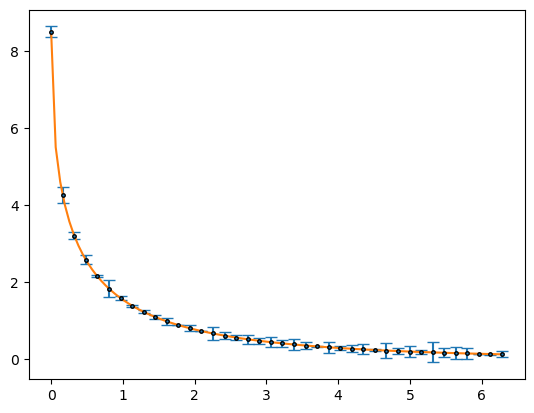

In [183]:
plt.errorbar(x_data, y_data, yerr_data, ls='', capsize=4, marker='.', ms=5, mec='black')
plt.plot(x_model, y_model)

In [161]:
popt

array([4. , 2. , 4.5, 1.5])

## Part C

In [184]:
x_data, y_data, yerr_data = np.loadtxt('data/curvefit_dataset3.csv', delimiter=',').T

In [185]:
def fit_func(x, A, omega, phi):
    return A*np.sin(omega*x + phi)

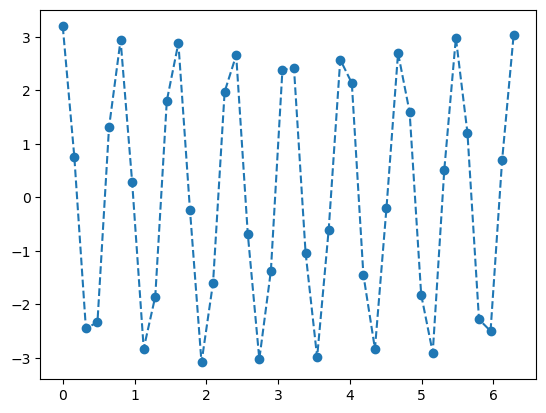

In [186]:
plt.plot(x_data, y_data, 'o--')

We need to give good initial parameters here. Observing the data, we see that the function starts at its maxima, so $\phi=\pi/2$. The amplitude is around 3 so $A=3$. We just need a good guess for $\omega$. Noting that the $\sin$ curve completes 4 cycles between $x=0$ and $x=\pi$, this means $\omega \pi = 8 \pi$ (each cycle is $2\pi$) so $\omega = 8$.

In [187]:
popt, pcov = curve_fit(fit_func, x_data, y_data, sigma=yerr_data, p0=[3, 8, np.pi/2])
perr = np.sqrt(np.diag(pcov))

In [188]:
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model = fit_func(x_model, *popt)

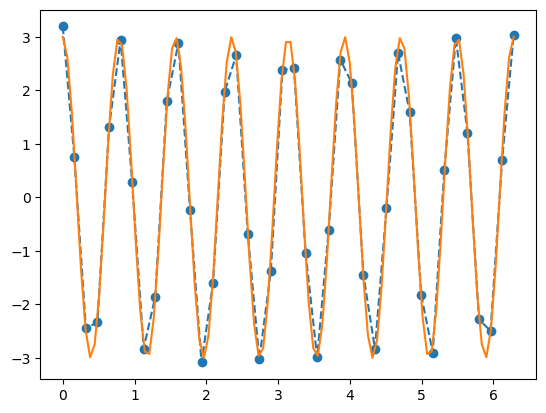

In [189]:
plt.plot(x_data, y_data, 'o--')
plt.plot(x_model, y_model)

# Question 2

## Part A

In [201]:
co60 = np.loadtxt('data/co60.csv', delimiter=',')
cs137 = np.loadtxt('data/cs137.csv', delimiter=',')
na22 = np.loadtxt('data/na22.csv', delimiter=',')
channel_num = np.arange(len(co60))

Text(0, 0.5, 'Counts')

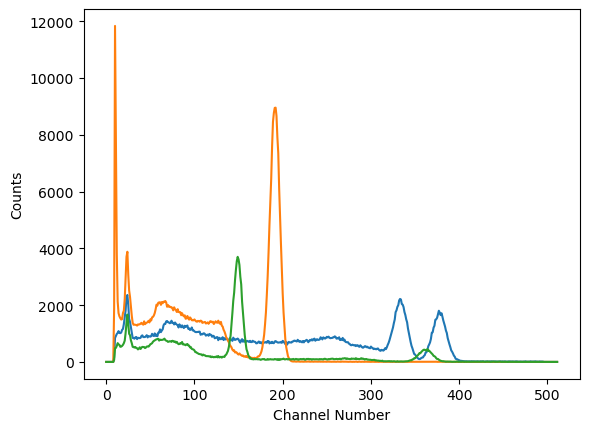

In [203]:
plt.plot(channel_num, co60)
plt.plot(channel_num, cs137)
plt.plot(channel_num, na22)
plt.xlabel('Channel Number')
plt.ylabel('Counts')

## Part B

In [261]:
def fit_func(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2 / (2*sigma**2))

* co60 bump 1

Get subset of data to fit

In [262]:
channel_num_subset = channel_num[(channel_num>320)*(channel_num<350)]
co60_subset = co60[(channel_num>320)*(channel_num<350)]

Get optimal parameters

In [263]:
popt_co60_1, pcov_co60_1 = curve_fit(fit_func, channel_num_subset, co60_subset, sigma=np.sqrt(co60_subset), p0=[2200, 335, 40])
perr_co60_1 = np.sqrt(np.diag(pcov_co60_1))

Get model numbers to plot

In [264]:
x_model = np.linspace(min(channel_num_subset), max(channel_num_subset), 1000)
y_model = fit_func(x_model, *popt_co60_1)

Plot

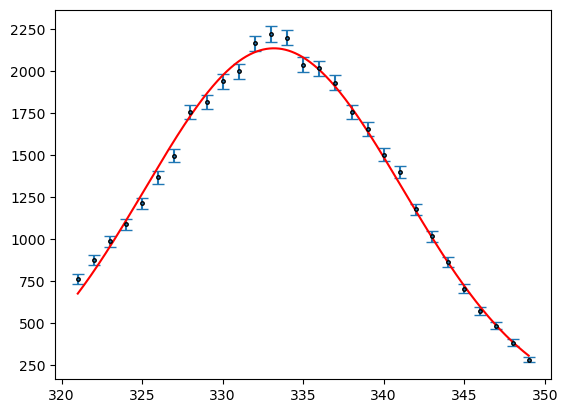

In [265]:
plt.errorbar(channel_num_subset, co60_subset, np.sqrt(co60_subset), ls='', capsize=4, marker='.', ms=5, mec='black')
plt.plot(x_model, y_model, color='r')

We'll write a function to automate this for the rest of the bumps:

In [266]:
def get_fit_parameters_and_plot(substance, channel_lower, channel_upper, p0):
    channel_num_subset = channel_num[(channel_num>channel_lower)*(channel_num<channel_upper)]
    substance_subset = substance[(channel_num>channel_lower)*(channel_num<channel_upper)]
    popt, pcov= curve_fit(fit_func, channel_num_subset, substance_subset, sigma=np.sqrt(substance_subset), p0=p0)
    perr = np.sqrt(np.diag(pcov))
    x_model = np.linspace(min(channel_num_subset), max(channel_num_subset), 1000)
    y_model = fit_func(x_model, *popt)
    plt.errorbar(channel_num_subset, substance_subset, np.sqrt(substance_subset), ls='', capsize=4, marker='.', ms=5, mec='black')
    plt.plot(x_model, y_model, color='r')
    perr = np.sqrt(np.diag(pcov))
    return popt, perr

* co60 bump 2

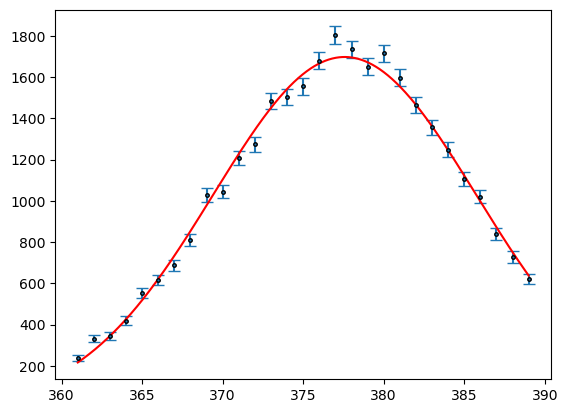

In [267]:
popt_co60_2, perr_co60_2 = get_fit_parameters_and_plot(co60, 360, 390, [1600, 375, 40])

* cs137 bump 1

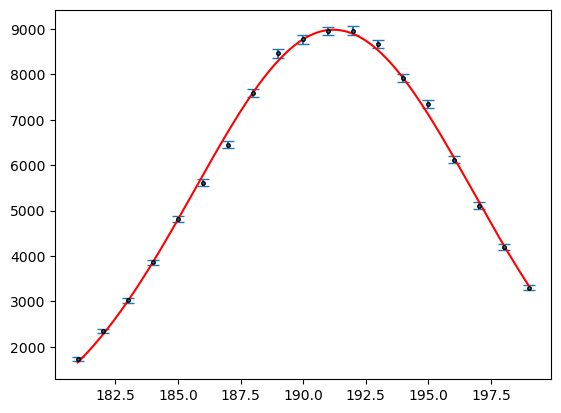

In [268]:
popt_cs137_1, perr_cs137_1 = get_fit_parameters_and_plot(cs137, 180, 200, [8500, 195, 40])

* na22 bump 1

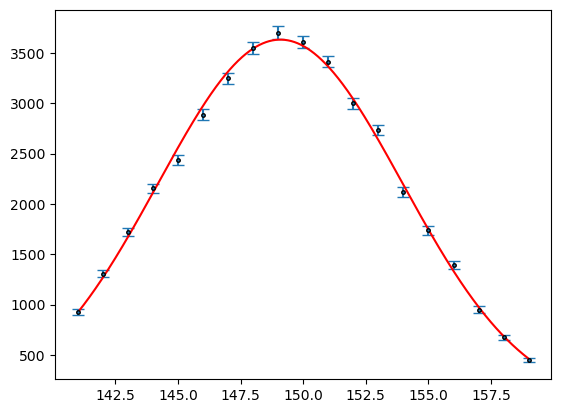

In [269]:
popt_na22_1, perr_na22_1 = get_fit_parameters_and_plot(na22, 140, 160, [3500, 150, 40])

* na22 bump 2

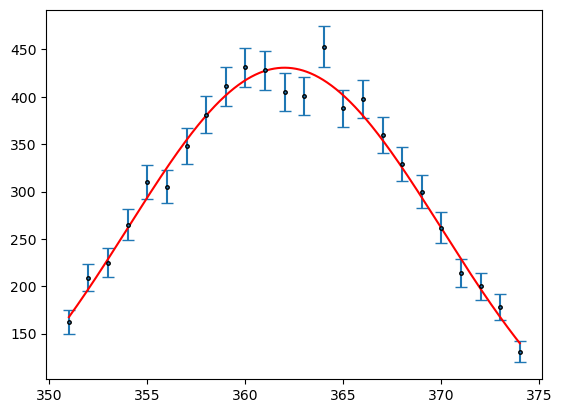

In [270]:
popt_na22_2, perr_na22_2 = get_fit_parameters_and_plot(na22, 350, 375, [500, 360, 40])

In [310]:
popt_na22_2

array([430.74992392, 361.99864786,  -8.00158749])

## Part C

We'll sort the data in ascending order

In [311]:
true_energies = np.array([0.511, 0.6617, 1.173, 1.275, 1.332])
mu_channels = np.array([popt_na22_1[1], popt_cs137_1[1], popt_co60_1[1], popt_na22_2[1], popt_co60_2[1]])
sigma_channels = np.abs(np.array([popt_na22_1[2], popt_cs137_1[2], popt_co60_1[2], popt_na22_2[2], popt_co60_2[2]]))
mu_channels_err = np.array([perr_na22_1[1], perr_cs137_1[1], perr_co60_1[1], perr_na22_2[1], perr_co60_2[1]])

Note: Error bars 50x longer than they actually are (this is typically done with small errors)

Text(0.5, 0, 'Energy [MeV]')

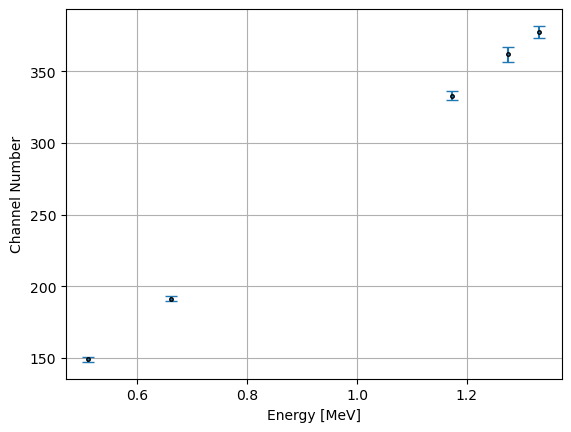

In [312]:
plt.errorbar(true_energies, mu_channels, 50*mu_channels_err, ls='', capsize=4, marker='.', ms=5, mec='black')
plt.grid()
plt.ylabel('Channel Number')
plt.xlabel('Energy [MeV]')

In [313]:
def line_func(x, a, b):
    return a*x+b

In [314]:
popt, pcov = curve_fit(line_func, true_energies, mu_channels, sigma=mu_channels_err)

In [315]:
x_model = np.linspace(min(true_energies), max(true_energies), 1000)
y_model = line_func(x_model, *popt)

Text(0.5, 0, 'Energy [MeV]')

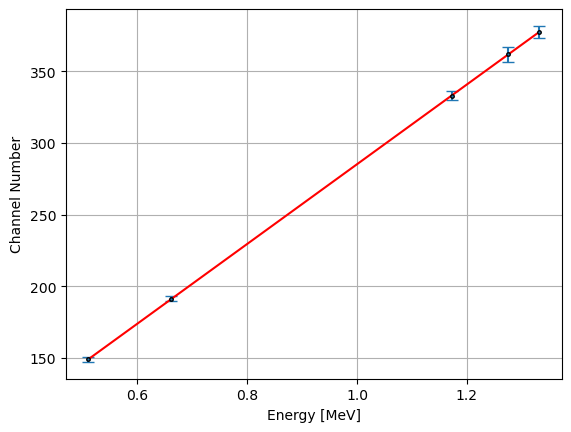

In [316]:
plt.errorbar(true_energies, mu_channels, 50*mu_channels_err, ls='', capsize=4, marker='.', ms=5, mec='black')
plt.plot(x_model, y_model, color='r')
plt.grid()
plt.ylabel('Channel Number')
plt.xlabel('Energy [MeV]')

## Part D

Since $\mu = aE+b$ we have $E= \frac{1}{a}(\mu-b)$. This is the formula for converting between channel number and energy. Since $\sigma$ is expressed in units of $\Delta \mu$ (change in channel number) we have $E_{\sigma} = \frac{1}{a}\sigma$

In [324]:
sigma_channels

array([4.8842793 , 5.54780535, 8.01987532, 8.00158749, 8.16539872])

In [325]:
mu_Es =  1/popt[0] * (mu_channels - popt[1])
sigma_Es =  1/popt[0] * sigma_channels

Text(0, 0.5, 'Detector Resolution [MeV]')

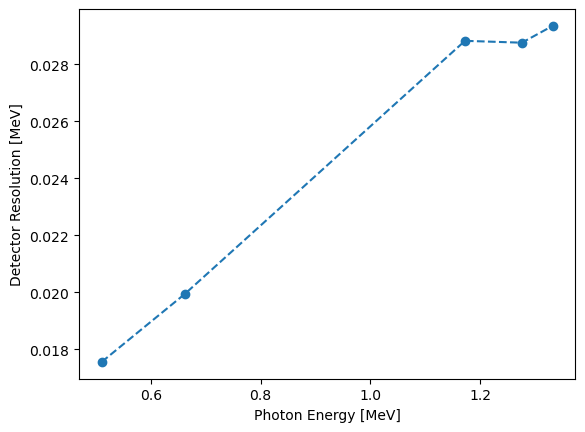

In [327]:
plt.plot(mu_Es, sigma_Es, 'o--')
plt.xlabel('Photon Energy [MeV]')
plt.ylabel('Detector Resolution [MeV]')

## Part E

In [330]:
interp_f =interp1d(mu_Es, sigma_Es, kind='cubic')

In [331]:
xs = np.linspace(min(mu_Es), max(mu_Es), 1000)
ys = interp_f(xs)

Text(0, 0.5, 'Detector Resolution [MeV]')

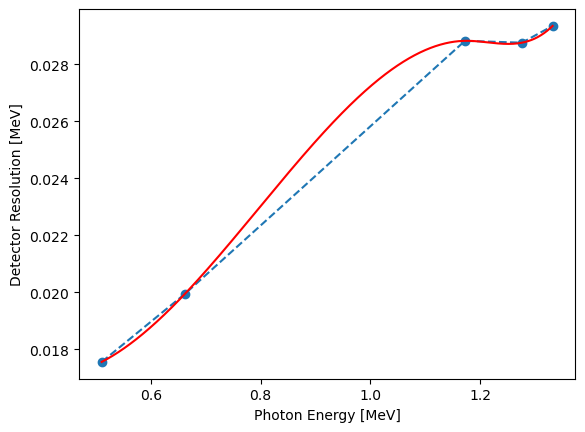

In [332]:
plt.plot(mu_Es, sigma_Es, 'o--')
plt.plot(xs, ys, color='r')
plt.xlabel('Photon Energy [MeV]')
plt.ylabel('Detector Resolution [MeV]')

Then we can use this interpolation function to get the detector resolution at 1MeV

In [333]:
interp_f(1)

array(0.02722448)

So at 1MeV, the detector resolution will be approximately 0.027MeV or 27keV.

# Question 3

## Part A

In [44]:
x = np.linspace(0,40,100)
y = chi2.pdf(x, df=18)

Text(0, 0.5, 'Probability Density')

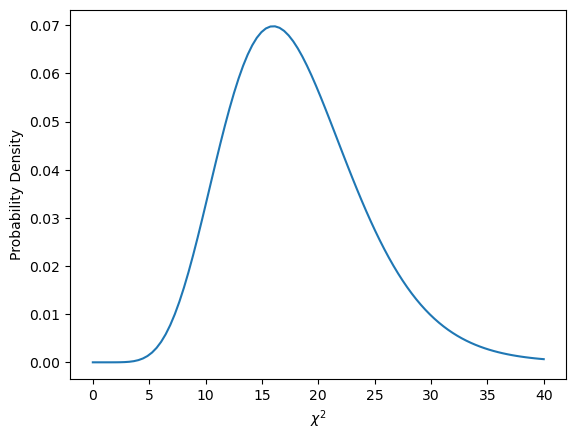

In [45]:
plt.plot(x,y)
plt.xlabel('$\chi^2$')
plt.ylabel('Probability Density')

## Part B

In [46]:
x_data = np.linspace(0, 2*np.pi, 20)
yerr_data = 0.1*np.random.randn(len(x_data))
y_data = 3*np.exp(-2*x_data) + yerr_data

<ErrorbarContainer object of 3 artists>

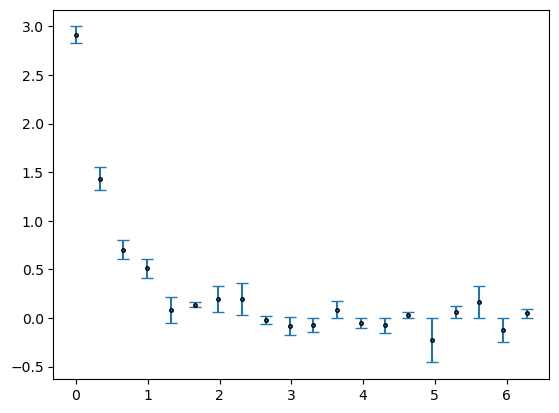

In [47]:
plt.errorbar(x_data, y_data, yerr_data, ls='', capsize=4, marker='.', ms=5, mec='black')

In [48]:
def fit_func(x, a, b):
    return a*np.exp(-b*x)

In [49]:
popt, pcov = curve_fit(fit_func, x_data, y_data, sigma=yerr_data)
perr = np.sqrt(np.diag(pcov))

In [50]:
popt, perr

(array([2.8927061, 1.9642616]), array([0.08125218, 0.10032671]))

## Part C

In [51]:
def get_chi2_fitvalue(xdata, ydata, yerrdata, model_f, popt):
    return sum((model_f(xdata, *popt)-ydata)**2 / yerrdata**2)

In [52]:
chi2_optimal = get_chi2_fitvalue(x_data, y_data, yerr_data, fit_func, popt)

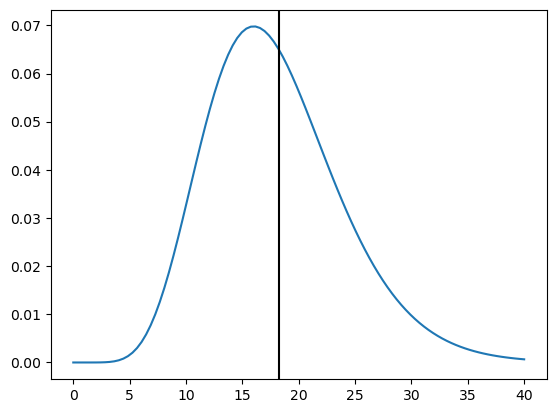

In [53]:
plt.plot(x,y)
plt.axvline(chi2_optimal, color='k')

In [57]:
def create_data_and_get_chi2():
    x_data = np.linspace(0, 2*np.pi, 20)
    yerr_data = 0.1*np.random.randn(len(x_data))
    y_data = 3*np.exp(-2*x_data) + yerr_data
    popt, pcov = curve_fit(fit_func, x_data, y_data, sigma=0.1*np.ones(len(x_data)))
    return get_chi2_fitvalue(x_data, y_data, 0.1*np.ones(len(x_data)), fit_func, popt)

In [62]:
chi2s = np.array([create_data_and_get_chi2() for i in range(1000)])

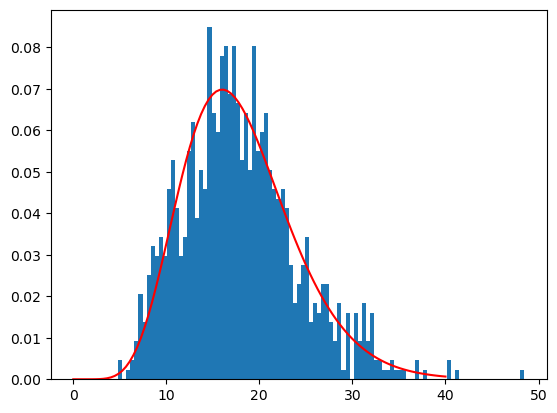

In [64]:
plt.hist(chi2s, density=True, bins=100)
plt.plot(x,y, color='r')

## Part E

In [81]:
x_data = np.linspace(0, 2*np.pi, 20)
yerr_data = 0.1*np.random.randn(len(x_data))
y_data = 3*np.exp(-2*x_data) + yerr_data
popt, pcov = curve_fit(fit_func, x_data, y_data, sigma=yerr_data)
perr = np.sqrt(np.diag(pcov))

## Part F

In [82]:
fit_func_1parameter = lambda x, b: fit_func(x, popt[0]+perr[0], b)

In [83]:
popt_1parameter, pcov_1parameter = curve_fit(fit_func_1parameter, x_data, y_data, sigma=yerr_data)
perr_1parameterr = np.sqrt(np.diag(pcov_1parameter))

In [84]:
chi2_optimal_1parameter = get_chi2_fitvalue(x_data, y_data, yerr_data, fit_func_1parameter, popt_1parameter)

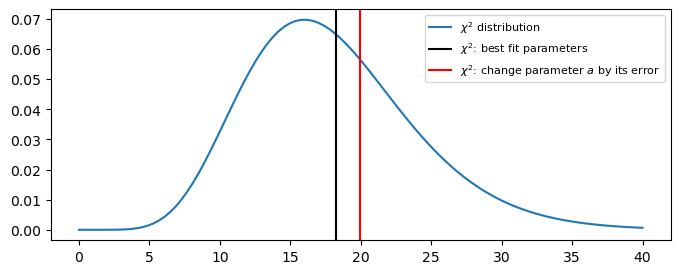

In [85]:
plt.figure(figsize=(8,3))
plt.plot(x,y, label='$\chi^2$ distribution')
plt.axvline(chi2_optimal, color='k', label='$\chi^2$: best fit parameters')
plt.axvline(chi2_optimal_1parameter, color='r', label='$\chi^2$: change parameter $a$ by its error')
plt.legend(fontsize=8)

In [86]:
chi2_optimal, chi2_optimal_1parameter

(18.22850282780666, 19.974009823189014)